### importing Modules

In [1]:
import pandas as pd #importing all the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn
import scipy
import warnings
warnings.filterwarnings("ignore")

### Loding The Dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv') 
#import file from  github
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info() # the training set has 891 examples and 11 features plus target variuable survived.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.dtypes #checking dataset types, 2 of the features are float 5 are integers and 5 are object

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.describe() # statistics info

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Preprocessing the Dataset

In [6]:
df.isnull().sum() # in Age,Cabin,Embarked having null values, Cabin columns have high null values-687.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

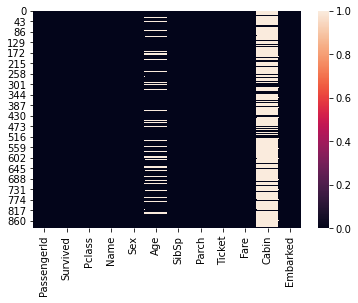

In [7]:
sns.heatmap(df.isnull()) # clearly heatmap shown Age, and Cabin having high null values

In [8]:
df['Embarked'].dtype

dtype('O')

In [9]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [10]:
df['Age'].replace(np.NaN,df['Age'].mean(),inplace=True)

The Embarked Feature has only 2 missing values ,which can be easily be filled.
but Age Features wchich has 177 missing values need directly related to target so we can not dropwe need to fill with mean
values.
much more tricky to deal with Cabin features because since 77% of it are missing.so we need to Drop that Feature


In [11]:
df.drop('Cabin',axis=1,inplace=True) # Cabin feature having high missing values so need to drop .

In [12]:
df.isnull().sum() # we fill missing numbers with mean of age and Embarked fratiures and drop Cabin feature

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### Exploratory Data analysis(EDA)

PassengerId       AxesSubplot(0.125,0.536818;0.168478x0.343182)
Survived       AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Pclass         AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Age            AxesSubplot(0.731522,0.536818;0.168478x0.343182)
SibSp                AxesSubplot(0.125,0.125;0.168478x0.343182)
Parch             AxesSubplot(0.327174,0.125;0.168478x0.343182)
Fare              AxesSubplot(0.529348,0.125;0.168478x0.343182)
dtype: object

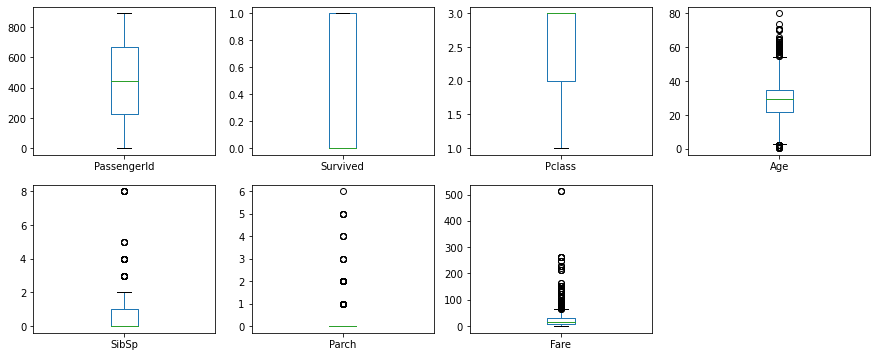

In [13]:
df.plot(kind='box',subplots=True,layout=(2,4),figsize=(15,6)) #checking Outlier in dataset some of columns present outlier

In [14]:
#Removing OUtlier
from scipy.stats import zscore
z=np.abs(zscore(df['Fare']))
z

array([5.02445171e-01, 7.86845294e-01, 4.88854258e-01, 4.20730236e-01,
       4.86337422e-01, 4.78116429e-01, 3.95813561e-01, 2.24083121e-01,
       4.24256141e-01, 4.29555021e-02, 3.12172378e-01, 1.13845709e-01,
       4.86337422e-01, 1.87093118e-02, 4.90279793e-01, 3.26266659e-01,
       6.19988892e-02, 3.86670720e-01, 2.85997284e-01, 5.02948539e-01,
       1.24919787e-01, 3.86670720e-01, 4.86756223e-01, 6.63597416e-02,
       2.24083121e-01, 1.64441595e-02, 5.02948539e-01, 4.64700108e+00,
       4.89776426e-01, 4.89442190e-01, 9.02720170e-02, 2.30172882e+00,
       4.92377828e-01, 4.37007438e-01, 1.00606170e+00, 3.98582080e-01,
       5.02863973e-01, 4.86337422e-01, 2.85997284e-01, 4.22073541e-01,
       4.57645492e-01, 2.25593223e-01, 4.89442190e-01, 1.88762532e-01,
       4.89776426e-01, 4.86337422e-01, 3.36334002e-01, 4.92377828e-01,
       2.11917743e-01, 2.90024222e-01, 1.50673744e-01, 4.91371093e-01,
       8.96496787e-01, 1.24919787e-01, 5.99510151e-01, 6.63597416e-02,
      

In [15]:
#Removing OUtlier
from scipy.stats import zscore
z=np.abs(zscore(df['Parch']))
z

array([0.47367361, 0.47367361, 0.47367361, 0.47367361, 0.47367361,
       0.47367361, 0.47367361, 0.76762988, 2.00893337, 0.47367361,
       0.76762988, 0.47367361, 0.47367361, 5.73284383, 0.47367361,
       0.47367361, 0.76762988, 0.47367361, 0.47367361, 0.47367361,
       0.47367361, 0.47367361, 0.47367361, 0.47367361, 0.76762988,
       5.73284383, 0.47367361, 2.00893337, 0.47367361, 0.47367361,
       0.47367361, 0.47367361, 0.47367361, 0.47367361, 0.47367361,
       0.47367361, 0.47367361, 0.47367361, 0.47367361, 0.47367361,
       0.47367361, 0.47367361, 0.47367361, 2.00893337, 0.47367361,
       0.47367361, 0.47367361, 0.47367361, 0.47367361, 0.47367361,
       0.76762988, 0.47367361, 0.47367361, 0.47367361, 0.76762988,
       0.47367361, 0.47367361, 0.47367361, 2.00893337, 2.00893337,
       0.47367361, 0.47367361, 0.47367361, 2.00893337, 0.47367361,
       0.76762988, 0.47367361, 0.47367361, 2.00893337, 0.47367361,
       0.47367361, 2.00893337, 0.47367361, 0.47367361, 0.47367

In [16]:
threshold=3
print(np.where(z>3))

(array([ 13,  25,  86, 167, 360, 437, 438, 567, 610, 638, 678, 736, 774,
       858, 885], dtype=int64),)


In [17]:
#Removing OUtlier
from scipy.stats import zscore
z=np.abs(zscore(df['SibSp']))
z

array([0.43279337, 0.43279337, 0.4745452 , 0.43279337, 0.4745452 ,
       0.4745452 , 0.4745452 , 2.24747049, 0.4745452 , 0.43279337,
       0.43279337, 0.4745452 , 0.4745452 , 0.43279337, 0.4745452 ,
       0.4745452 , 3.15480905, 0.4745452 , 0.43279337, 0.4745452 ,
       0.4745452 , 0.4745452 , 0.4745452 , 0.4745452 , 2.24747049,
       0.43279337, 0.4745452 , 2.24747049, 0.4745452 , 0.4745452 ,
       0.4745452 , 0.43279337, 0.4745452 , 0.4745452 , 0.43279337,
       0.43279337, 0.4745452 , 0.4745452 , 1.34013193, 0.43279337,
       0.43279337, 0.43279337, 0.4745452 , 0.43279337, 0.4745452 ,
       0.4745452 , 0.43279337, 0.4745452 , 1.34013193, 0.43279337,
       3.15480905, 0.4745452 , 0.43279337, 0.43279337, 0.4745452 ,
       0.4745452 , 0.4745452 , 0.4745452 , 0.43279337, 4.06214761,
       0.4745452 , 0.4745452 , 0.43279337, 2.24747049, 0.4745452 ,
       0.43279337, 0.4745452 , 0.4745452 , 3.15480905, 1.34013193,
       0.4745452 , 4.06214761, 0.4745452 , 0.43279337, 0.47454

In [18]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

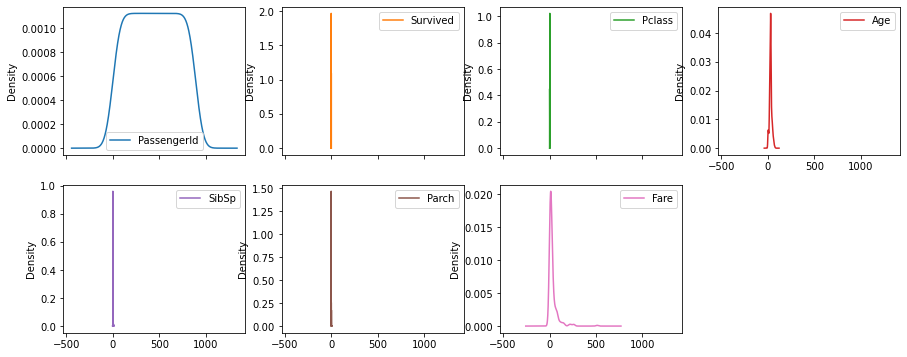

In [19]:
#to check Distribution of skewness
df.plot(kind='kde',subplots=True,layout=(2,4),figsize=(15,6))

### Correlation Matrix

<AxesSubplot:>

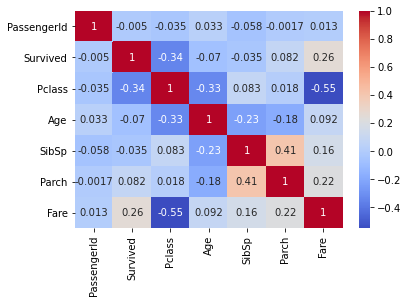

In [20]:
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
# Parch are positive correlated with target variable Pclass are negative correlated with target variable

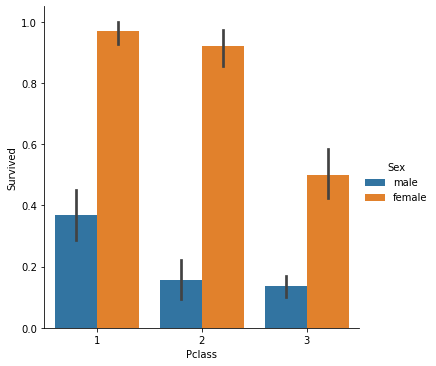

In [21]:
g=sns.catplot(x="Pclass",y="Survived",hue='Sex',data=df,kind='bar')
plt.show()

For Women the survival chances are higher,for man the probability of survival is very low.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

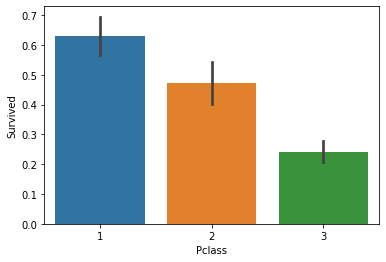

In [22]:
sns.barplot(x="Pclass",y='Survived',data=df)

Observation:
   
   Pclass 1 we can spot a high probability of survived but very low in Pclass 3.    

In [23]:
# finding the number of peopele survived and not survived
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

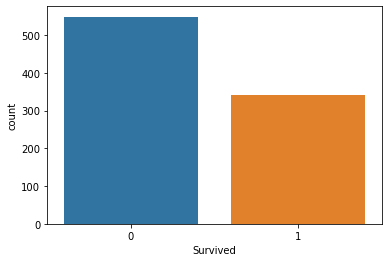

In [24]:
sns.countplot(df['Survived'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

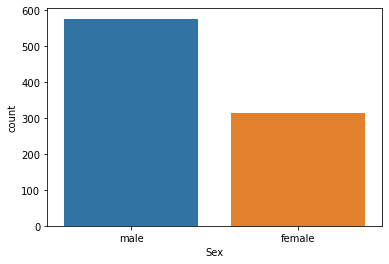

In [25]:
# making a countplot for sex column
sns.countplot('Sex',data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

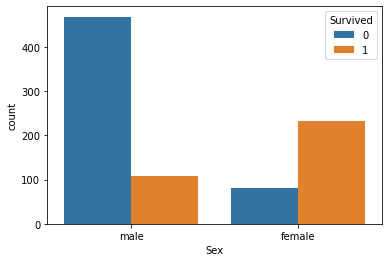

In [26]:
sns.countplot('Sex',hue='Survived',data=df) 

In [27]:
df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

since the ticket attribute has 681 unique tickets,it will be a bit tricky to convert them into useful categories.
so we will drop it from the dataset.

In [28]:
df.drop('Ticket',axis=1,inplace=True)

In [29]:
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
df["Embarked"].replace(['S'],'0',inplace=True)
df["Embarked"].replace(['C'],'1',inplace=True) #need to convert into numeric 
df["Embarked"].replace(['Q'],'2',inplace=True)

In [31]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [32]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [33]:
df["Sex"].replace(['male'],'0',inplace=True)
df["Sex"].replace(['female'],'1',inplace=True)

In [34]:
# separating features and target
x=df.drop(columns=['PassengerId','Name','Survived'],axis=1)
y=df['Survived']

In [35]:
df.drop('Name',axis=1,inplace=True)

### MinMaxScaler

In [36]:
from sklearn.preprocessing import MinMaxScaler #to equilise all dataset for higher accuracy
Scaler=MinMaxScaler()
Scaled=Scaler.fit_transform(x)
Scaled

array([[1.        , 0.        , 0.27117366, ..., 0.        , 0.01415106,
        0.        ],
       [0.        , 1.        , 0.4722292 , ..., 0.        , 0.13913574,
        0.5       ],
       [1.        , 1.        , 0.32143755, ..., 0.        , 0.01546857,
        0.        ],
       ...,
       [1.        , 1.        , 0.36792055, ..., 0.33333333, 0.04577135,
        0.        ],
       [0.        , 0.        , 0.32143755, ..., 0.        , 0.0585561 ,
        0.5       ],
       [1.        , 0.        , 0.39683338, ..., 0.        , 0.01512699,
        1.        ]])

In [37]:
from sklearn.model_selection import train_test_split # import libraries for model devloping .
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=2)

In [38]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.000000,1,0,7.2500,0
1,2,1,1,1,38.000000,1,0,71.2833,1
2,3,1,3,1,26.000000,0,0,7.9250,0
3,4,1,1,1,35.000000,1,0,53.1000,0
4,5,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000,0
887,888,1,1,1,19.000000,0,0,30.0000,0
888,889,0,3,1,29.699118,1,2,23.4500,0
889,890,1,1,0,26.000000,0,0,30.0000,1


In [39]:
print(x.shape,x_train.shape,x_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(891, 7) (712, 7) (179, 7)
(891,) (712,) (179,)


In [40]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [43]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [44]:
pred=lg.predict(x_test)
print(pred)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [45]:
print("Accuracy_Score ::",accuracy_score(y_test,pred))

Accuracy_Score :: 0.7821229050279329


In [46]:
print(confusion_matrix(y_test,pred)) # 179 out of 49 survived and 91 not survived

[[91  9]
 [30 49]]


In [47]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.84      0.62      0.72        79

    accuracy                           0.78       179
   macro avg       0.80      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179



### Model Training

In [48]:
from sklearn.svm import SVC # Support VECtor Regressor
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)

0.800561797752809

In [49]:
from sklearn.svm import SVC 
svc1=SVC(kernel='rbf')
svc1.fit(x_train,y_train)
svc1.score(x_train,y_train)

0.6797752808988764

In [50]:
from sklearn.svm import SVC 
svc2=SVC(kernel='poly')
svc2.fit(x_train,y_train)
svc2.score(x_train,y_train)

0.672752808988764

In [51]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [61]:
dtc=DecisionTreeClassifier(criterion='gini')
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.776536312849162
[[82 18]
 [22 57]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       100
           1       0.76      0.72      0.74        79

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [53]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.6815642458100558
[[83 17]
 [40 39]]
              precision    recall  f1-score   support

           0       0.67      0.83      0.74       100
           1       0.70      0.49      0.58        79

    accuracy                           0.68       179
   macro avg       0.69      0.66      0.66       179
weighted avg       0.68      0.68      0.67       179



In [54]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
mnb.score(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.6536312849162011
[[82 18]
 [44 35]]
              precision    recall  f1-score   support

           0       0.65      0.82      0.73       100
           1       0.66      0.44      0.53        79

    accuracy                           0.65       179
   macro avg       0.66      0.63      0.63       179
weighted avg       0.66      0.65      0.64       179



### Cross Validation 

Hold OUt

In [55]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.80446927 0.80898876 0.78651685 0.75280899 0.78651685]
0.7878601468834348
0.01977106024273551


### KFold Cross Validation

In [56]:
from sklearn.model_selection import KFold

score=cross_val_score(mnb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.59217877 0.71910112 0.70786517 0.73595506 0.71348315]
0.6937166530663486
0.051631948020578314


In [57]:
from sklearn.model_selection import KFold

score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.62011173 0.65168539 0.70786517 0.7247191  0.7247191 ]
0.6858200991777038
0.042414661318567574


In [58]:
from sklearn.model_selection import KFold
#model score and cross validation score nearby same
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.72067039 0.79213483 0.80337079 0.74719101 0.79775281]
0.77222396585274
0.0325659599250822


### Hyperparameter Tuning:GRidSearch CV

In [62]:
from sklearn.model_selection import GridSearchCV

grid_param={'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)                               #DesicisionTreeClassifier having highest score with cross validation 
best_result=gd_sr.best_score_
print(best_result)
print(round(best_result,2))

{'criterion': 'entropy'}
0.7710815391375306
0.77


In [63]:
grid_param={'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)                              
best_result=gd_sr.best_score_
print(best_result)
print(round(best_result,2))

{'criterion': 'gini'}
0.7722176887828762
0.77


### Conclusion

In [64]:
#prediction of the total Survived and not survived titanic accident.
pred=dtc.predict(x_test)
print("Predict Result survived",pred)
print("Actual survived",y_test)

Predict Result survived [0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0
 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0
 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1]
Actual survived 707    1
37     0
615    1
169    0
68     1
      ..
89     0
80     0
846    0
870    0
251    0
Name: Survived, Length: 179, dtype: int64


### Saving Best Model

In [66]:
import pickle
filename='Titanic Survived'
pickle.dump(dtc,open(filename,'wb'))